ETL

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

In [2]:
conn = pymysql.connect(
host='localhost',
port=3305,
user='root',
password='123456',
database='interview',
charset='utf8')

## show data of dim_customers

In [3]:
df_customers=pd.read_sql("SELECT * FROM dim_customer",con=conn)
df_customers.head()

,customer_id,name,segment
0,32,3e24af1eb3b1cee9b4c980e31061da704367db00e22a91...,Segment B
1,37,04d88f5d26b4a9f38be30bc079f427f77affbf0920216a...,Segment A
2,123,8e75517c1103e852feefb34c3e185aeb536f5e80b014ef...,Segment B
3,444,acb475452906005b2bc4d95a4ab8bf1902c5b7d1586fc6...,Segment A
4,488,a3b97697baa6a8d9640d2d02e2a53016e54812f306c272...,Segment A


## show data of fact_date_customer_campaign

In [4]:
df_fact=pd.read_sql("SELECT * FROM fact_date_customer_campaign",con=conn)
df_fact.head()

,date,customer_id,campaign_id,cost,datacost,revenue
0,2017-01-01,1300,53531,0.002750,0.0,0.001110
1,2017-01-01,3058,34922,0.016703,0.0,0.003349
2,2017-01-01,1239,37750,2.925945,0.0,0.617055
3,2017-01-01,4715,55032,0.010428,0.0,0.003072
4,2017-01-01,6121,67501,0.766920,0.0,0.217341


### data checks

In [5]:
# check table fact_date_customer_campaign null values.

df=pd.read_sql("""SELECT * FROM fact_date_customer_campaign WHERE date IS NULL 
OR customer_id IS NULL OR cost IS NULL OR datacost IS NULL OR revenue IS NULL""",con=conn)
df.head()

,date,customer_id,campaign_id,cost,datacost,revenue


In [6]:
# check table dim_customers duplicated values.

df=pd.read_sql("SELECT customer_id,COUNT(*) AS customer_num FROM dim_customer GROUP BY customer_id HAVING COUNT(*)>1",con=conn)
df.head()

,customer_id,customer_num


o How many customers are there in total?

o How many customers are there in segment A?

o How many customers are there in segment B?

o How much total gross revenue was there for the year (both segments)?

o How much total net revenue was there for the year (both segments)?



## part1
SELECT COUNT(*) AS total_customers FROM dim_customer;

SELECT COUNT(*) AS segment_a_customers FROM dim_customer WHERE segment='Segment A';

SELECT COUNT(*) AS segment_b_customers FROM dim_customer WHERE segment='Segment B';

SELECT segment, COUNT(*) AS customers FROM dim_customer GROUP BY segment;

SELECT ROUND(SUM(cost + datacost + revenue),2) AS total_gross_revenue FROM fact_date_customer_campaign;

SELECT ROUND(SUM(revenue),2) AS total_net_revenue FROM fact_date_customer_campaign;

## part2

for customer_id is the primary key of table dim_customer, so i don't need to use distinct to get the number of customers.

In [7]:
total_customers = pd.read_sql("SELECT COUNT(*) AS total_customers FROM dim_customer", con=conn)
total_customers


,total_customers
0,859


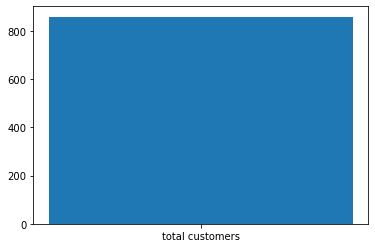

In [8]:
x=['total customers']

df=total_customers

y=df['total_customers']
plt.bar(x, y)
 
plt.show()

In [9]:
segment_a=pd.read_sql("SELECT COUNT(*) AS segment_a_customers FROM dim_customer WHERE segment='Segment A'", con=conn)
segment_a

,segment_a_customers
0,832


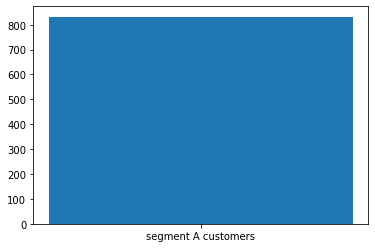

In [10]:
x=['segment A customers']

df=segment_a
y=df['segment_a_customers']
plt.bar(x, y)
 
plt.show()

In [11]:
segment_b=pd.read_sql("SELECT COUNT(*) AS segment_b_customers FROM dim_customer WHERE segment='Segment B'", con=conn)
segment_b

,segment_b_customers
0,27


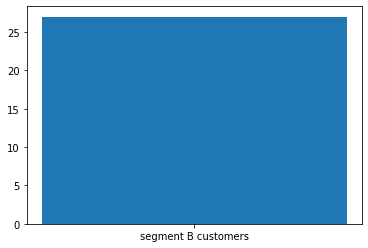

In [12]:
x=['segment B customers']

df=segment_b
y=df['segment_b_customers']
plt.bar(x, y)
 
plt.show()

In [13]:
segment_ab=pd.read_sql("SELECT segment, COUNT(*) AS customers FROM dim_customer GROUP BY segment", con=conn)
segment_ab

,segment,customers
0,Segment A,832
1,Segment B,27


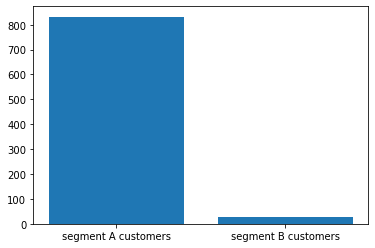

In [14]:
x=['segment A customers','segment B customers']

df=segment_ab
y=df['customers']
plt.bar(x, y)
 
plt.show()

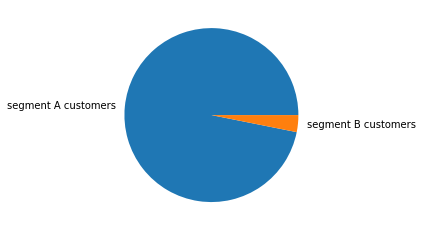

In [15]:
x=['segment A customers','segment B customers']

df=segment_ab
y=df['customers']

plt.pie(x=y, labels=x)

plt.show()

In [16]:
total_gross_revenue=pd.read_sql("SELECT ROUND(SUM(cost + datacost + revenue),2) AS total_gross_revenue FROM fact_date_customer_campaign", con=conn)
total_gross_revenue


,total_gross_revenue
0,15463325.38


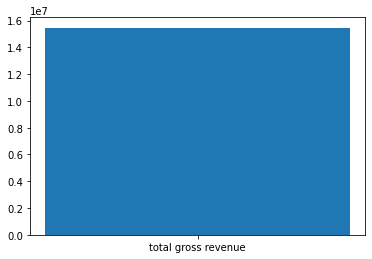

In [17]:
x=['total gross revenue']

df=total_gross_revenue
y=df['total_gross_revenue']
plt.bar(x, y)
 
plt.show()


In [18]:
total_net_revenue=pd.read_sql("SELECT ROUND(SUM(revenue),2) AS total_net_revenue FROM fact_date_customer_campaign", con=conn)
total_net_revenue

,total_net_revenue
0,4284116.42


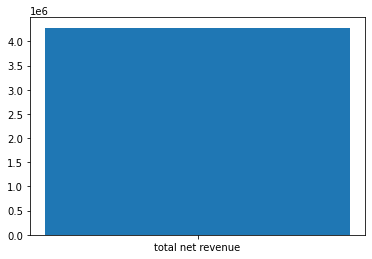

In [19]:
x=['total net revenue']

df=total_net_revenue
y=df['total_net_revenue']
plt.bar(x, y)
 
plt.show()

### Margin percentage ( = net/gross)


In [20]:
margin_percentage=pd.read_sql("SELECT ROUND(SUM(revenue)/SUM(cost + datacost + revenue),2) AS margin_percentage FROM fact_date_customer_campaign",con=conn)
margin_percentage

,margin_percentage
0,0.28


### Day-over-Day (D/D) Gross growth 

SELECT distinct t.date,
(
SELECT MAX(date)
FROM
(SELECT DISTINCT date FROM fact_date_customer_campaign) tt
WHERE t.Date>tt.Date ) AS last_date
FROM
(SELECT DISTINCT date FROM fact_date_customer_campaign) t;

In [21]:
## check day-over-day continue.
dd=pd.read_sql("SELECT distinct t.date,( SELECT MAX(date) FROM (SELECT DISTINCT date FROM fact_date_customer_campaign) tt WHERE t.Date>tt.Date ) AS last_date FROM (SELECT DISTINCT date FROM fact_date_customer_campaign) t", con=conn)
dd

,date,last_date
0,2017-01-01,None
1,2017-01-02,2017-01-01
2,2017-01-03,2017-01-02
3,2017-01-04,2017-01-03
4,2017-01-05,2017-01-04
...,...,...
360,2017-12-27,2017-12-26
361,2017-12-28,2017-12-27
362,2017-12-29,2017-12-28
363,2017-12-30,2017-12-29


generate the report

In [22]:
dd=pd.read_sql(""" SELECT t1.Date, 
CONCAT('$',FORMAT(t1.Gross,2)) AS Gross, 
CONCAT('$',FORMAT(t1.Net,2)) as Net, 
t1.Margin,
IFNULL(CONCAT((t1.Gross- t3.Gross)*100/t3.Gross,'%'),'0%') AS "D/D Gross"
FROM
(
SELECT date AS Date, SUM(cost + datacost + revenue) AS Gross,
SUM(revenue) AS Net,
CONCAT(SUM(revenue)*100/SUM(cost + datacost + revenue),'%') AS Margin
FROM fact_date_customer_campaign
GROUP BY date
) t1 LEFT JOIN 
(
SELECT distinct t.date,
(
SELECT MAX(date)
FROM
(SELECT DISTINCT date FROM fact_date_customer_campaign) tt
WHERE t.Date>tt.Date ) AS last_date
FROM
(SELECT DISTINCT date FROM fact_date_customer_campaign) t
) t2 ON t1.Date=t2.date
LEFT JOIN
(
SELECT date AS Date, SUM(cost + datacost + revenue) AS Gross,
SUM(revenue) AS Net,
CONCAT(SUM(revenue)*100/SUM(cost + datacost + revenue),'%') AS Margin
FROM fact_date_customer_campaign
GROUP BY date
) t3 ON t3.Date=t2.last_date """, con=conn)

dd

,Date,Gross,Net,Margin,D/D Gross
0,2017-01-01,"$19,993.89","$5,246.83",26.242160523090219813146272491027%,0%
1,2017-01-02,"$22,456.87","$5,985.16",26.651816440061076690677426348069%,12.318671510142766153527845180242%
2,2017-01-03,"$23,462.06","$6,304.96",26.873016591276207907909013474067%,4.476094333916550978825064391504%
3,2017-01-04,"$24,206.65","$6,470.14",26.728762991695361060033841180968%,3.173563036746938607345253287500%
4,2017-01-05,"$24,429.29","$6,607.21",27.046248091943340663176980508609%,0.919745491650233301673734306873%
...,...,...,...,...,...
360,2017-12-27,"$59,273.17","$15,952.30",26.913189933702552314014388681805%,5.404276433039772013678376635235%
361,2017-12-28,"$66,173.43","$17,494.86",26.437890512038395429065877583997%,11.641450174001318528269726082134%
362,2017-12-29,"$58,241.50","$15,749.75",27.042142242250733122221243215145%,-11.986580884521057413768690060888%
363,2017-12-30,"$49,958.05","$13,075.12",26.172193057775998531246286241971%,-14.222593695096477457475356662670%


<!-- SELECT t1.Date, 
CONCAT('$',FORMAT(t1.Gross,2)) AS Gross, 
CONCAT('$',FORMAT(t1.Net,2)) as Net,
t1.Margin,
IFNULL(CONCAT(ROUND((t1.Gross- t3.Gross)*100/t3.Gross,0),'%'),'-') AS "D/D Gross"
FROM
(
SELECT date AS Date, SUM(cost + datacost + revenue) AS Gross,
SUM(revenue) AS Net,
CONCAT(ROUND(SUM(revenue)*100/SUM(cost + datacost + revenue),0),'%') AS Margin
FROM fact_date_customer_campaign
GROUP BY date
) t1 LEFT JOIN 
(
SELECT distinct t.date,
(
SELECT MAX(date)
FROM
(SELECT DISTINCT date FROM fact_date_customer_campaign) tt
WHERE t.Date>tt.Date ) AS last_date
FROM
(SELECT DISTINCT date FROM fact_date_customer_campaign) t
) t2 ON t1.Date=t2.date
LEFT JOIN
(
SELECT date AS Date, SUM(cost + datacost + revenue) AS Gross,
SUM(revenue) AS Net,
CONCAT(ROUND(SUM(revenue)*100/SUM(cost + datacost + revenue),0),'%') AS Margin
FROM fact_date_customer_campaign
GROUP BY date
) t3 ON t3.Date=t2.last_date; -->


In [23]:
dd=pd.read_sql(""" SELECT t1.Date, 
CONCAT('$',FORMAT(t1.Gross,2)) AS Gross, 
CONCAT('$',FORMAT(t1.Net,2)) as Net, 
t1.Margin,
IFNULL(CONCAT((t1.Gross- t3.Gross)*100/t3.Gross,'%'),'0%') AS "D/D Gross"
FROM
(
SELECT date AS Date, SUM(cost + datacost + revenue) AS Gross,
SUM(revenue) AS Net,
CONCAT(SUM(revenue)*100/SUM(cost + datacost + revenue),'%') AS Margin
FROM fact_date_customer_campaign
GROUP BY date
) t1 LEFT JOIN 
(
SELECT distinct t.date,
(
SELECT MAX(date)
FROM
(SELECT DISTINCT date FROM fact_date_customer_campaign) tt
WHERE t.Date>tt.Date ) AS last_date
FROM
(SELECT DISTINCT date FROM fact_date_customer_campaign) t
) t2 ON t1.Date=t2.date
LEFT JOIN
(
SELECT date AS Date, SUM(cost + datacost + revenue) AS Gross,
SUM(revenue) AS Net,
CONCAT(SUM(revenue)*100/SUM(cost + datacost + revenue),'%') AS Margin
FROM fact_date_customer_campaign
GROUP BY date
) t3 ON t3.Date=t2.last_date """, con=conn)


def format1(column):
    return int(round(float(column[:-1]),0))

def format2(column):
    return str(column)+'%'


dd['Margin']=dd['Margin'].apply(lambda x: format1(x))
dd['D/D Gross']=dd['D/D Gross'].apply(lambda x :format1(x))
    
dd['Margin']=dd['Margin'].apply(lambda x: format2(x))
dd['D/D Gross']=dd['D/D Gross'].apply(lambda x :format2(x))

dd

,Date,Gross,Net,Margin,D/D Gross
0,2017-01-01,"$19,993.89","$5,246.83",26%,0%
1,2017-01-02,"$22,456.87","$5,985.16",27%,12%
2,2017-01-03,"$23,462.06","$6,304.96",27%,4%
3,2017-01-04,"$24,206.65","$6,470.14",27%,3%
4,2017-01-05,"$24,429.29","$6,607.21",27%,1%
...,...,...,...,...,...
360,2017-12-27,"$59,273.17","$15,952.30",27%,5%
361,2017-12-28,"$66,173.43","$17,494.86",26%,12%
362,2017-12-29,"$58,241.50","$15,749.75",27%,-12%
363,2017-12-30,"$49,958.05","$13,075.12",26%,-14%


In [25]:
## save the above result into excel.
writer = pd.ExcelWriter('./report_output.xlsx')
df=dd
df.to_excel(writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=False, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None)
writer.save()

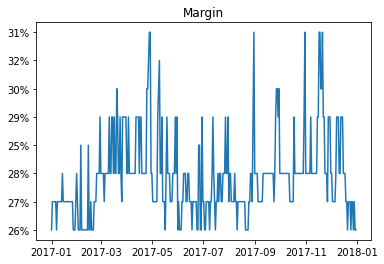

In [26]:
dd=df
x=dd["Date"]
y=dd["Margin"]
plt.title("Margin")
plt.plot(x, y)

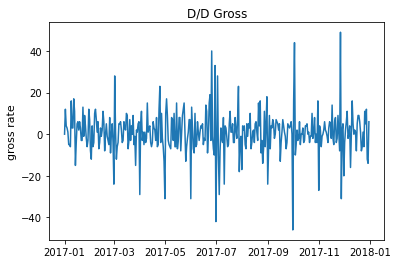

In [27]:
dd=df
x=dd["Date"]
y=dd["D/D Gross"]
y_y=[]
for yy in y:
    if yy!='-':
        y_y.append(int(yy[:-1]))
    else:
        y_y.append(0)
plt.ylabel("gross rate", fontsize=11)

plt.title("D/D Gross")
plt.plot(x, y_y)

## part3

• Answers to questions in Part 1.

• The final report output from Part 2.

• The code used to generate this report.

• Documentation of any questions/uncertainties and decisions you had to make along the way.

• Documentation of any steps you did not have time to complete or features you would add given more time.

• The summary of your analysis from Part 3.


From part 1, I can know there're 859 customers in total. And in segment A, there're 832 customers, in segment B, there're 27 customers.
For both segments, there's about 15463325 total gross revenue.
For both segments, there's about 4284116 total net revenue.


The final report of part 2 shown in part 2. And the code is also shown.

In this project, i made a descision about counting the customers by group "segment A" and "segment B". 
And, I think that if there's more than one year data, it can also be grouped to calculate the total gross revenue
and total net revenue.


If given more time, I will calculate the total gross revenue by different segment customers. And I also calculate 
the net revenue by different segment customers.


From part 2, I made a brief summary of my work. For this project, I used ETL to load data from mysql database.
then I use pandas to fetch data and use matplotlib to show data.

For this case, the data is fully not noise, there's no null values of the two tables, and it is well suit for calculation of gross revenue,
net revenue and margin, and d/d gross.

数据异常值检查
1.对于必须非空值进行非空检查
2.重复值检查

3.如果有数据异常情况，需要进行数据清洗，可以通过删除重复值，删除异常值的数据或填充默认值进行数据清洗。
在本次case中，要计算gross的增量比，则需要检查日期的连贯性。

未来需要考虑得问题：
1.在数据场景复杂的情况下，可以进行多维度的数据分析，比如客户所在的不同的城市中，total gross revenue， total net revenue,
margin 以及日增长量，通过分析不同的维度（客户所在城市\性别\年龄段)等得到更加精准的数据展示。
2. 根据不同维度得数据分析结论进行商业决策。